In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from awpy.data import NAV

file_jan = '/mnt/data06/andyxia/data/Jan/Jan_bomb_data.json'
file_feb = '/mnt/data06/andyxia/data/Feb/Feb_bomb_data.json'
file_mar = '/mnt/data06/andyxia/data/Mar/Mar_bomb_data.json'
file_apr = '/mnt/data06/andyxia/data/Apr/Apr_bomb_data.json'
file_may = '/mnt/data06/andyxia/data/May/May_bomb_data.json'
file_jun = '/mnt/data06/andyxia/data/Jun/Jun_bomb_data.json'
file_jul = '/mnt/data06/andyxia/data/Jul/Jul_bomb_data.json'
file_aug = '/mnt/data06/andyxia/data/Aug/Aug_bomb_data.json'
file_sep = '/mnt/data06/andyxia/data/Sep/Sep_bomb_data.json'
file_oct = '/mnt/data06/andyxia/data/Oct/Oct_bomb_data.json'
file_nov = '/mnt/data06/andyxia/data/Nov/Nov_bomb_data.json'
file_dec = '/mnt/data06/andyxia/data/Dec/Dec_bomb_data.json'
df1 = pd.read_json(file_jan)
df2 = pd.read_json(file_feb)
df3 = pd.read_json(file_mar)
df4 = pd.read_json(file_apr)
df5 = pd.read_json(file_may)
df6 = pd.read_json(file_jun)
df7 = pd.read_json(file_jul)
df8 = pd.read_json(file_aug)
df9 = pd.read_json(file_sep)
df10 = pd.read_json(file_oct)
df11= pd.read_json(file_nov)
df12 = pd.read_json(file_dec)

### Replace with the right directory path ###
df1 = pd.read_json('Path to your file')
df2 = pd.read_json('Path to your second file')
### Put all files in this list. (Works with a single file)
demofiles=[df1, df2]

In [4]:
def sync_team(player_stat):

    default_values = {
        'cash': 0,
        'cash_spend_this_round': 0, 'round_damage': 0, 'primary_weapon': 'None',
        'secondary_weapon': 'None', 
        'grenades_left': 0, 'flashes_left': 0, 'smokes_left': 0, 'molotovs_left': 0,
        'total_kills': 0, 'round_kills': 0, 'total_deaths': 0, 'callout': 'None',
        'average_damage_per_round': 0, 'amount_spent': 0
    }
    standardized_stat = {key: player_stat.get(key, default_values[key]) for key in default_values}
    return standardized_stat


def getBombSites(bombsite):
    map=NAV["de_dust2"]
    bombSite=[]
    for num, row in map.items():
        if row['areaName'] == bombsite:
            bombSite.append((row['northWestX']+row['southEastX'])/2)
            bombSite.append((row['northWestY']+row['southEastY'])/2)
           
    return bombSite
    
def distance(x1, y1, bombSite):
    return math.sqrt((bombSite[0] - x1)**2 + (bombSite[1] - y1)**2)

def add_name(stat, name):
    updated_stat = {f'{name}_{key}': value for key, value in stat.items()}
    # print(type(updated_stat))
    return updated_stat

def read(files):
    stats=[]
    counter=0
    for df in files:
        data_array=np.array(df)
        # print(data_array)
        for entry in data_array:
            # print(entry[0])
            if entry[0]!='error set':
                # print(isinstance(entry[2],dict))
                for value in entry:
                    if isinstance(value,dict):
                        tplayercount=0
                        ctplayercount=0
                        stat=[]
                        t_alive=0
                        t_teamHP=0
                        t_teamARMOR=0
                        t_teamEqVal=0
                        t_teamCash=0
                        t_teamCashSpent=0
                        t_teamDamage=0
                        t_ak47=0
                        t_m4a1=0
                        t_awp=0
                        t_glock=0
                        t_deagle=0
                        t_grenades=0
                        t_flashes=0
                        t_smokes=0
                        t_molotovs=0
                        t_totalKills=0
                        t_roundKills=0
                        t_totalDeaths=0
                        t_teamAveDamage=0
                        t_teamDistance=0
                        ct_alive=0
                        ct_teamHP=0
                        ct_teamARMOR=0
                        ct_teamEqVal=0
                        ct_teamCash=0
                        ct_teamCashSpent=0
                        ct_teamDamage=0
                        ct_ak47=0
                        ct_m4a1=0
                        ct_awp=0
                        ct_usps=0
                        ct_deagle=0
                        ct_grenades=0
                        ct_flashes=0
                        ct_smokes=0
                        ct_molotovs=0
                        ct_totalKills=0
                        ct_roundKills=0
                        ct_totalDeaths=0
                        ct_teamAveDamage=0
                        ct_teamDistance=0
                        if value['bombSite']=='A':
                            stat.append({'bombSite_A':True})
                            bombSite=getBombSites('BombsiteA')
                        else:
                            stat.append({'bombSite_A':False})
                            bombSite=getBombSites('BombsiteB')
                        if value['T']['living_players'] is not None:
                            for player in value['T']['living_players']:
                                t_teamHP+=player['hp']
                                t_teamARMOR+=player['armor']
                                t_teamEqVal+=player['equipment_value']
                                t_teamCash+=player['cash']
                                t_teamCashSpent+=player['cash_spend_this_round']
                                t_teamDamage+=player['round_damage']
                                t_grenades+=player['grenades_left']
                                t_flashes+=player['flashes_left']
                                t_smokes+=player['smokes_left']
                                t_molotovs+=player['molotovs_left']
                                t_totalKills+=player['total_kills']
                                t_roundKills+=player['round_kills']
                                t_totalDeaths+=player['total_deaths']
                                t_teamAveDamage+=player['average_damage_per_round']
                                t_teamDistance+=distance(player['lastKnownPosition'][0],player['lastKnownPosition'][1],bombSite)
                                if player['primary_weapon'] == 'AK-47':
                                    t_ak47+=1 
                                if player['primary_weapon'] == 'M4A1':
                                    t_m4a1+=1 
                                if player['primary_weapon'] == 'AWP':
                                    t_awp+=1 
                                if player['secondary_weapon'] == 'Glock-18':
                                    t_glock+=1 
                                if player['secondary_weapon'] == 'Desert Eagle':
                                    t_deagle+=1 
                                # synced=sync_team(player)
                                tplayercount+=1
                                # stat.append(add_name(synced,f'T_player{tplayercount}'))
                                t_alive+=1
                        if value['T']['dead_players'] is not None:
                            for player in value['T']['dead_players']:
                                # player['is_alive']=False
                                player['hp']=0
                                t_teamEqVal+=player['equipment_value']
                                t_teamCash+=player['cash']
                                t_teamCashSpent+=player['cash_spend_this_round']
                                t_teamDamage+=player['round_damage']
                                t_totalKills+=player['total_kills']
                                t_roundKills+=player['round_kills']
                                t_totalDeaths+=player['total_deaths']
                                t_teamAveDamage+=player['average_damage_per_round']
                                t_teamDistance+=distance(player['lastKnownPosition'][0],player['lastKnownPosition'][1],bombSite)
                                # synced=sync_team(player)
                                tplayercount+=1
                                # stat.append(add_name(synced,f'T_player{tplayercount}'))
                        if value['CT']['living_players'] is not None:
                            for player in value['CT']['living_players']:
                                ct_teamHP+=player['hp']
                                ct_teamARMOR+=player['armor']
                                ct_teamEqVal+=player['equipment_value']
                                ct_teamCash+=player['cash']
                                ct_teamCashSpent+=player['cash_spend_this_round']
                                ct_teamDamage+=player['round_damage']
                                ct_grenades+=player['grenades_left']
                                ct_flashes+=player['flashes_left']
                                ct_smokes+=player['smokes_left']
                                ct_molotovs+=player['molotovs_left']
                                ct_totalKills+=player['total_kills']
                                ct_roundKills+=player['round_kills']
                                ct_totalDeaths+=player['total_deaths']
                                ct_teamAveDamage+=player['average_damage_per_round']
                                ct_teamDistance+=distance(player['lastKnownPosition'][0],player['lastKnownPosition'][1],bombSite)
                                if player['primary_weapon'] == 'AK-47':
                                    ct_ak47+=1 
                                if player['primary_weapon'] == 'M4A1':
                                    ct_m4a1+=1 
                                if player['primary_weapon'] == 'AWP':
                                    ct_awp+=1 
                                if player['secondary_weapon'] == 'USP-S':
                                    ct_usps+=1 
                                if player['secondary_weapon'] == 'Desert Eagle':
                                    ct_deagle+=1 
                                # synced=sync_team(player)
                                ctplayercount+=1
                                # stat.append(add_name(synced,f'CT_player{ctplayercount}'))
                                ct_alive+=1
                        if value['CT']['dead_players'] is not None:
                            for player in value['CT']['dead_players']:
                                # player['is_alive']=False
                                player['hp']=0
                                ct_teamEqVal+=player['equipment_value']
                                ct_teamCash+=player['cash']
                                ct_teamCashSpent+=player['cash_spend_this_round']
                                ct_teamDamage+=player['round_damage']
                                ct_totalKills+=player['total_kills']
                                ct_roundKills+=player['round_kills']
                                ct_totalDeaths+=player['total_deaths']
                                ct_teamAveDamage+=player['average_damage_per_round']
                                ct_teamDistance+=distance(player['lastKnownPosition'][0],player['lastKnownPosition'][1],bombSite)
                                # synced=sync_team(player)
                                ctplayercount+=1
                                # stat.append(add_name(synced,f'CT_player{ctplayercount}'))
                        
                        stat.append({'T_alives':t_alive})
                        stat.append({'T_teamHP':t_teamHP})
                        stat.append({'T_teamARMOR':t_teamHP})
                        stat.append({'T_teamEqVal':t_teamEqVal})
                        stat.append({'T_teamCash':t_teamCash})
                        stat.append({'T_teamCashSpent':t_teamCashSpent})
                        stat.append({'T_teamDamage':t_teamDamage})
                        stat.append({'T_totalKills':t_totalKills})
                        stat.append({'T_roundKills':t_roundKills})
                        stat.append({'T_totalDeaths':t_totalDeaths})
                        stat.append({'T_teamAveDamage':t_teamAveDamage})
                        stat.append({'T_teamDistance':t_teamDistance/5})
                        if t_alive != 0:
                            stat.append({'T_AK-47':t_ak47/t_alive})
                            stat.append({'T_M4A1':t_m4a1/t_alive})
                            stat.append({'T_AWP':t_awp/t_alive})
                            stat.append({'T_GLOCK':t_glock/t_alive})
                            stat.append({'T_DEAGLE':t_deagle/t_alive})
                            stat.append({'T_grenades':t_grenades/t_alive})
                            stat.append({'T_flashes':t_flashes/t_alive})
                            stat.append({'T_smokes':t_smokes/t_alive})
                            stat.append({'T_molotovs':t_molotovs/t_alive})
                        else:
                            stat.append({'T_AK-47':0})
                            stat.append({'T_M4A1':0})
                            stat.append({'T_AWP':0})
                            stat.append({'T_GLOCK':0})
                            stat.append({'T_DEAGLE':0})
                            stat.append({'T_grenades':0})
                            stat.append({'T_flashes':0})
                            stat.append({'T_smokes':0})
                            stat.append({'T_molotovs':0})
                        stat.append({'CT_alives':ct_alive})
                        stat.append({'CT_teamHP':ct_teamHP})
                        stat.append({'CT_teamARMOR':ct_teamHP})
                        stat.append({'CT_teamEqVal':ct_teamEqVal})
                        stat.append({'CT_teamCash':ct_teamCash})
                        stat.append({'CT_teamCashSpent':ct_teamCashSpent})
                        stat.append({'CT_teamDamage':ct_teamDamage})
                        stat.append({'CT_totalKills':ct_totalKills})
                        stat.append({'CT_roundKills':ct_roundKills})
                        stat.append({'CT_totalDeaths':ct_totalDeaths})
                        stat.append({'CT_teamAveDamage':ct_teamAveDamage})
                        stat.append({'CT_teamDistance':ct_teamDistance/5})
                        if ct_alive != 0:
                            stat.append({'CT_AK-47': ct_ak47/ct_alive})
                            stat.append({'CT_M4A1': ct_m4a1/ct_alive})
                            stat.append({'CT_AWP': ct_awp/ct_alive})
                            stat.append({'CT_USPS':ct_usps/ct_alive})
                            stat.append({'CT_DEAGLE':ct_deagle/ct_alive})
                            stat.append({'CT_grenades':ct_grenades/ct_alive})
                            stat.append({'CT_flashes':ct_flashes/ct_alive})
                            stat.append({'CT_smokes':ct_smokes/ct_alive})
                            stat.append({'CT_molotovs':ct_molotovs/ct_alive})
                        else:
                            stat.append({'CT_AK-47': 0})
                            stat.append({'CT_M4A1': 0})
                            stat.append({'CT_AWP': 0})
                            stat.append({'CT_USPS':0})
                            stat.append({'CT_DEAGLE':0})
                            stat.append({'CT_grenades':0})
                            stat.append({'CT_flashes':0})
                            stat.append({'CT_smokes':0})
                            stat.append({'CT_molotovs':0})
                        
                        if value['winner']=='T':
                            stat.append({'T_Wins':1})
                        else:
                            stat.append({'T_Wins':0})
                        
                        stats.append(stat)
                        
    return stats

def OHE(stats):
    flattened_stats = [player for sublist in stats for player in sublist]
    df = pd.DataFrame(flattened_stats)
    flat=[]
    for stat in stats:
        holder={}
        for item in stat:
            holder.update(item)
        flat.append(holder)
    df = pd.DataFrame(flat)
    return df

stats=read(demofiles)
df=OHE(stats)

for col in df.columns:
    nan_rows = df[col].isna()
    if nan_rows.any():
        print(f"{col} contains NaN at rows:")
        print(nan_rows[nan_rows].index.tolist())

df.head(10)

,bombSite_A,T_alives,T_teamHP,T_teamARMOR,T_teamEqVal,T_teamCash,T_teamCashSpent,T_teamDamage,T_totalKills,T_roundKills,...,CT_AK-47,CT_M4A1,CT_AWP,CT_USPS,CT_DEAGLE,CT_grenades,CT_flashes,CT_smokes,CT_molotovs,T_Wins
0,True,4,219,219,26050,8900,20000,400,79,4,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,1
1,False,5,477,477,27350,26800,3300,200,79,2,...,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,1
2,True,2,122,122,26550,7350,25750,454,79,4,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1
3,False,3,240,240,27150,9650,16700,398,79,4,...,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.000000,1.0,0.0,1
4,True,2,174,174,27500,12450,15600,220,79,2,...,0.0,0.666667,0.333333,0.666667,0.0,0.0,0.333333,0.0,0.0,1
5,True,4,246,246,26050,13800,16400,352,79,3,...,0.5,0.000000,0.000000,0.500000,0.5,0.0,0.000000,0.0,0.0,1
6,True,2,89,89,22050,1400,21050,382,79,3,...,0.0,0.500000,0.500000,0.500000,0.0,0.0,0.500000,0.0,0.0,1
7,False,2,72,72,14400,7350,8850,326,50,3,...,0.5,0.500000,0.000000,1.000000,0.0,0.0,0.500000,0.0,0.0,0
8,False,2,120,120,22800,4650,20350,400,97,4,...,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1
9,True,2,73,73,20500,1050,20800,249,73,2,...,0.0,0.333333,0.000000,0.666667,0.0,0.0,0.000000,0.0,0.0,0


In [5]:
df.describe()

,T_alives,T_teamHP,T_teamARMOR,T_teamEqVal,T_teamCash,T_teamCashSpent,T_teamDamage,T_totalKills,T_roundKills,T_totalDeaths,...,CT_AK-47,CT_M4A1,CT_AWP,CT_USPS,CT_DEAGLE,CT_grenades,CT_flashes,CT_smokes,CT_molotovs,T_Wins
count,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,...,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000
mean,3.240747,258.280454,258.280454,21824.828405,11754.294695,14370.851241,290.725447,92.189300,2.624735,89.349990,...,0.140465,0.340602,0.164515,0.700773,0.125955,0.110943,0.374917,0.223140,0.018375,0.744499
std,1.182193,118.494039,118.494039,7100.759336,11865.810559,8004.932362,118.191989,20.149554,1.211386,22.162492,...,0.264777,0.366549,0.256874,0.376583,0.269816,0.234825,0.456733,0.315825,0.105442,0.436156
min,1.000000,1.000000,1.000000,1000.000000,400.000000,0.000000,0.000000,10.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,172.000000,172.000000,20400.000000,2100.000000,8000.000000,200.000000,82.000000,2.000000,77.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,259.000000,259.000000,24700.000000,8100.000000,14800.000000,300.000000,92.000000,3.000000,90.000000,...,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000
75%,4.000000,348.000000,348.000000,26450.000000,17600.000000,21300.000000,400.000000,101.000000,4.000000,100.000000,...,0.250000,0.666667,0.333333,1.000000,0.000000,0.000000,0.666667,0.500000,0.000000,1.000000
max,5.000000,500.000000,500.000000,34900.000000,80000.000000,43400.000000,776.000000,217.000000,6.000000,220.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


Feature: bombSite_A, Score: -0.14911
Feature: T_alives, Score: 1.45059
Feature: T_teamHP, Score: 0.29901
Feature: T_teamARMOR, Score: 0.29901
Feature: T_teamEqVal, Score: 0.62288
Feature: T_teamCash, Score: -0.09298
Feature: T_teamCashSpent, Score: -0.01366
Feature: T_teamDamage, Score: -0.22236
Feature: T_totalKills, Score: 0.38461
Feature: T_roundKills, Score: -0.01025
Feature: T_totalDeaths, Score: 0.16691
Feature: T_teamAveDamage, Score: 0.05356
Feature: T_teamDistance, Score: -0.09694
Feature: T_AK-47, Score: 0.06454
Feature: T_M4A1, Score: 0.01115
Feature: T_AWP, Score: 0.00638
Feature: T_GLOCK, Score: -0.05329
Feature: T_DEAGLE, Score: -0.04797
Feature: T_grenades, Score: -0.03874
Feature: T_flashes, Score: -0.03794
Feature: T_smokes, Score: 0.11747
Feature: T_molotovs, Score: -0.06708
Feature: CT_alives, Score: -1.22831
Feature: CT_teamHP, Score: -0.34754
Feature: CT_teamARMOR, Score: -0.34754
Feature: CT_teamEqVal, Score: -0.31560
Feature: CT_teamCash, Score: 0.03750
Feature: 

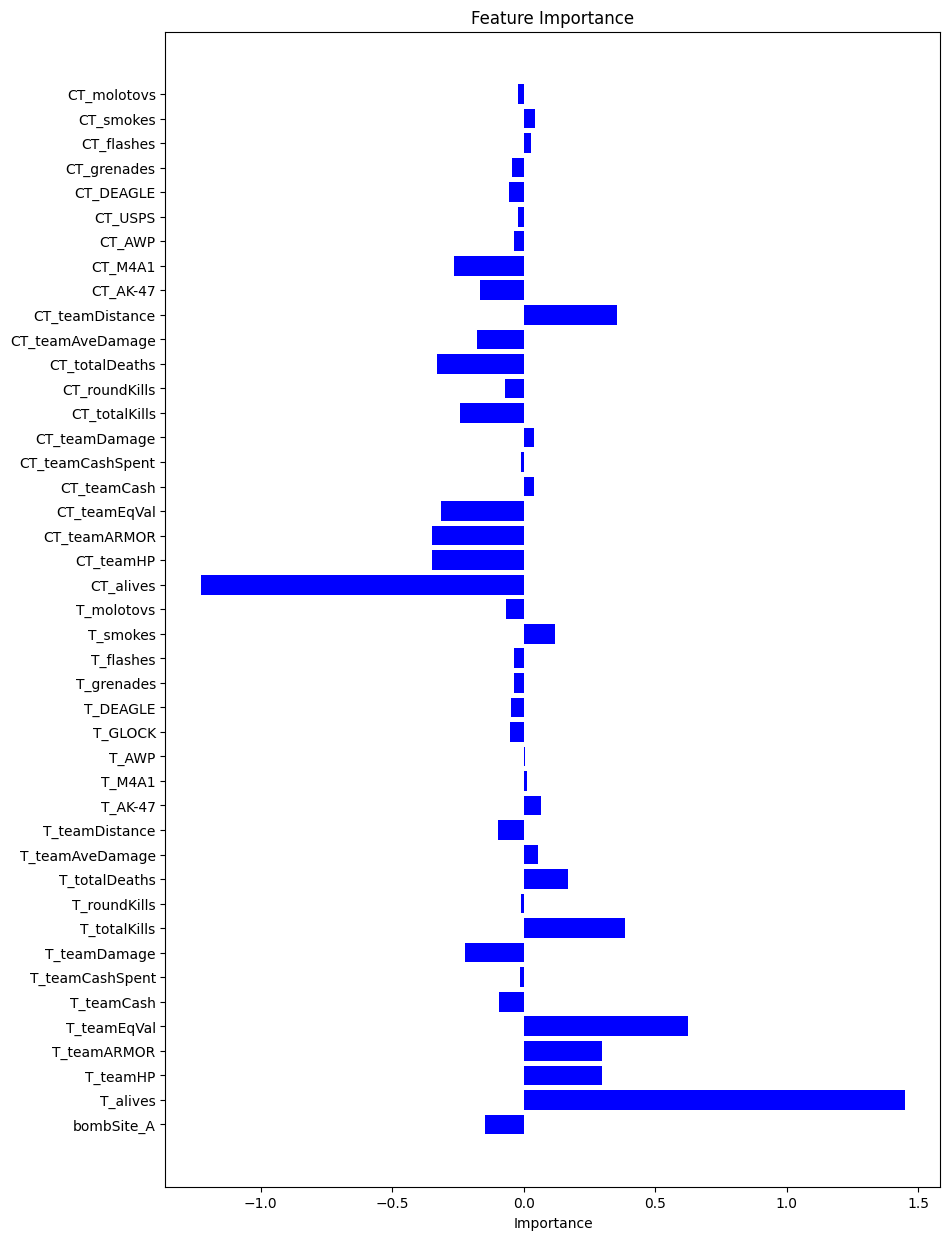

Accuracy: 0.8508659397049391
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68       781
           1       0.88      0.92      0.90      2337

    accuracy                           0.85      3118
   macro avg       0.81      0.78      0.79      3118
weighted avg       0.85      0.85      0.85      3118



In [6]:
X = df.drop(columns=['T_Wins'])
y = df['T_Wins']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
importance = model.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (df.columns[i],v))
plt.figure(figsize=(10, 15)) 
plt.barh([df.columns[i] for i in range(len(importance))], importance, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Feature: bombSite_A, Score: 0.00000
Feature: T_alives, Score: 0.59800
Feature: T_teamHP, Score: 0.07556
Feature: T_teamARMOR, Score: 0.00000
Feature: T_teamEqVal, Score: 0.00000
Feature: T_teamCash, Score: 0.00000
Feature: T_teamCashSpent, Score: 0.00000
Feature: T_teamDamage, Score: 0.00000
Feature: T_totalKills, Score: 0.00000
Feature: T_roundKills, Score: 0.03677
Feature: T_totalDeaths, Score: 0.00000
Feature: T_teamAveDamage, Score: 0.00000
Feature: T_teamDistance, Score: 0.00000
Feature: T_AK-47, Score: 0.00000
Feature: T_M4A1, Score: 0.00000
Feature: T_AWP, Score: 0.00000
Feature: T_GLOCK, Score: 0.00000
Feature: T_DEAGLE, Score: 0.00000
Feature: T_grenades, Score: 0.00000
Feature: T_flashes, Score: 0.00000
Feature: T_smokes, Score: 0.00000
Feature: T_molotovs, Score: 0.00000
Feature: CT_alives, Score: 0.12953
Feature: CT_teamHP, Score: 0.16014
Feature: CT_teamARMOR, Score: 0.00000
Feature: CT_teamEqVal, Score: 0.00000
Feature: CT_teamCash, Score: 0.00000
Feature: CT_teamCashSpen

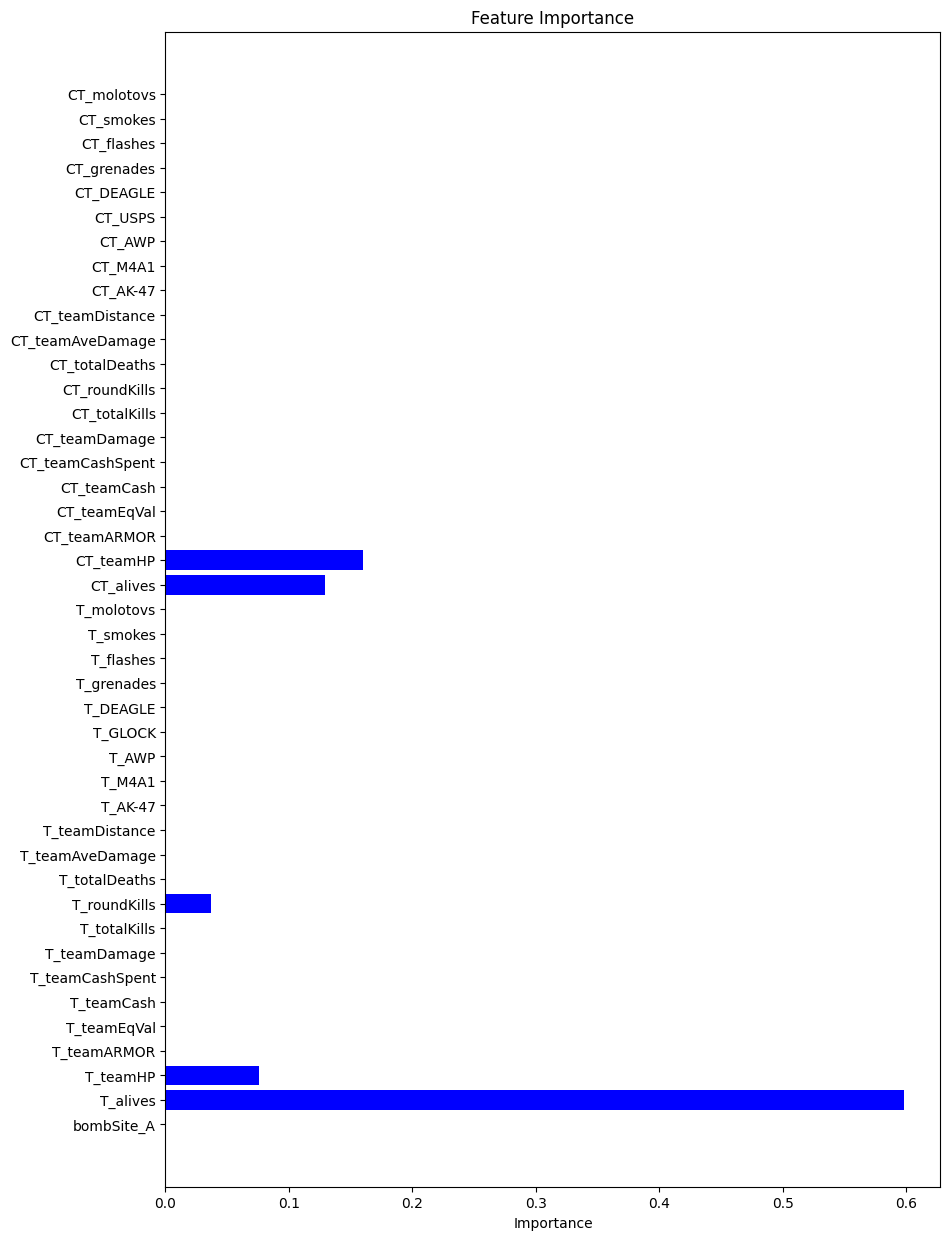

Accuracy: 0.8242463117382938
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       781
           1       0.89      0.87      0.88      2337

    accuracy                           0.82      3118
   macro avg       0.77      0.78      0.77      3118
weighted avg       0.83      0.82      0.83      3118



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (df.columns[i],v))
plt.figure(figsize=(10, 15)) 
plt.barh([df.columns[i] for i in range(len(importance))], importance, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Feature: bombSite_A, Score: 0.00000
Feature: T_alives, Score: 0.15533
Feature: T_teamHP, Score: 0.03928
Feature: T_teamARMOR, Score: 0.00000
Feature: T_teamEqVal, Score: 0.00000
Feature: T_teamCash, Score: 0.00000
Feature: T_teamCashSpent, Score: 0.00000
Feature: T_teamDamage, Score: 0.00000
Feature: T_totalKills, Score: 0.00000
Feature: T_roundKills, Score: 0.00000
Feature: T_totalDeaths, Score: 0.00000
Feature: T_teamAveDamage, Score: 0.00000
Feature: T_teamDistance, Score: 0.00000
Feature: T_AK-47, Score: 0.00000
Feature: T_M4A1, Score: 0.00000
Feature: T_AWP, Score: 0.00000
Feature: T_GLOCK, Score: 0.00000
Feature: T_DEAGLE, Score: 0.00000
Feature: T_grenades, Score: 0.00000
Feature: T_flashes, Score: 0.00000
Feature: T_smokes, Score: 0.00000
Feature: T_molotovs, Score: 0.00000
Feature: CT_alives, Score: 0.05381
Feature: CT_teamHP, Score: 0.04096
Feature: CT_teamARMOR, Score: 0.00000
Feature: CT_teamEqVal, Score: 0.00000
Feature: CT_teamCash, Score: 0.00000
Feature: CT_teamCashSpen

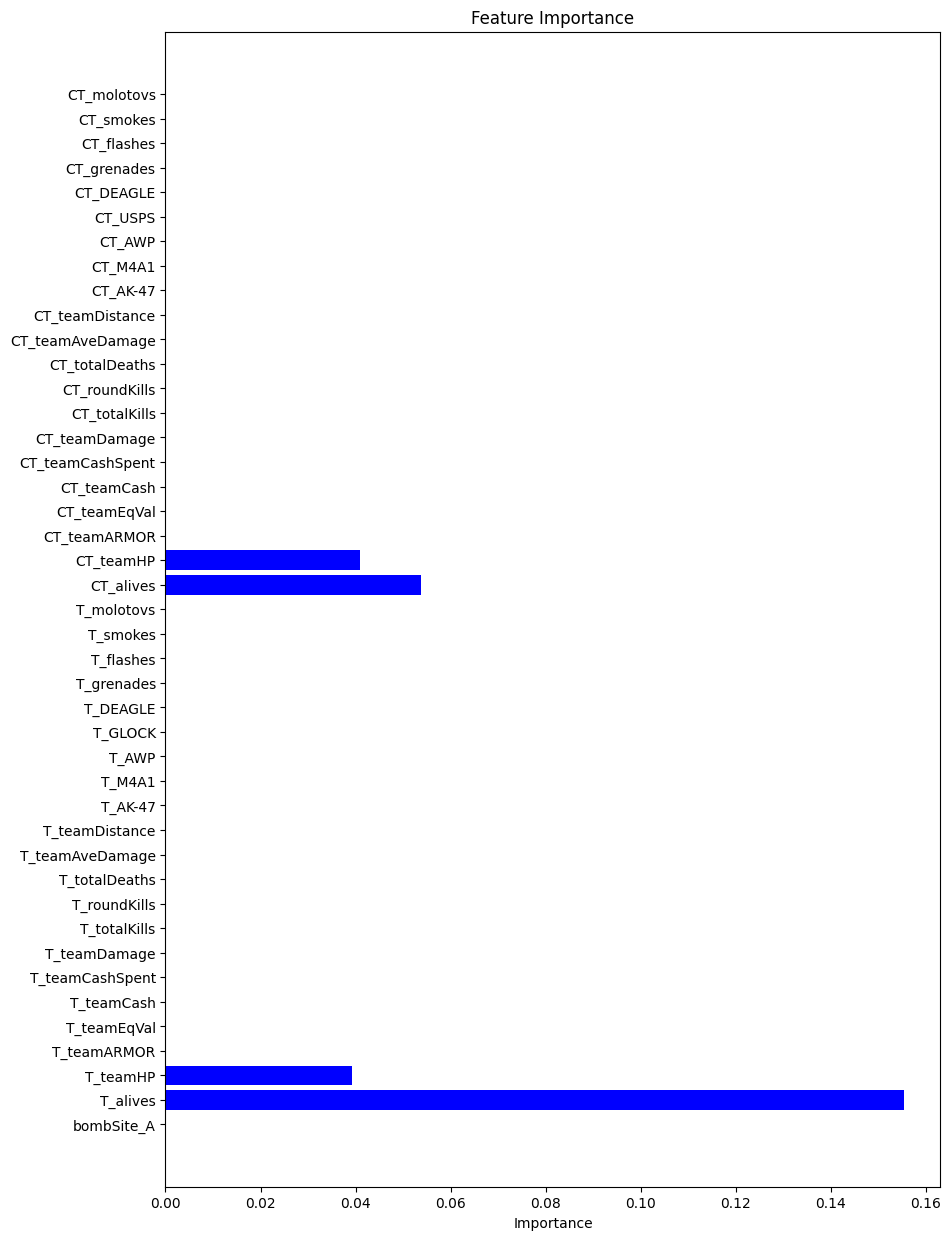

Accuracy: 0.8187940987812701
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.57      0.61       781
           1       0.86      0.90      0.88      2337

    accuracy                           0.82      3118
   macro avg       0.76      0.74      0.75      3118
weighted avg       0.81      0.82      0.81      3118



In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (df.columns[i],v))
plt.figure(figsize=(10, 15)) 
plt.barh([df.columns[i] for i in range(len(importance))], importance, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Feature bombSite_A importance: 0.0009621552277100376
Feature T_alives importance: -0.003527902501603619
Feature T_teamHP importance: -0.0009621552277100376
Feature T_teamARMOR importance: -0.0009621552277100376
Feature T_teamEqVal importance: 0.0012828736369467908
Feature T_teamCash importance: 0.0009621552277100376
Feature T_teamCashSpent importance: 0.0
Feature T_teamDamage importance: 0.007697241821680523
Feature T_totalKills importance: 0.0
Feature T_roundKills importance: 0.01218729955099418
Feature T_totalDeaths importance: 0.0003207184092366422
Feature T_teamAveDamage importance: -0.0025657472738935816
Feature T_teamDistance importance: 0.0025657472738934706
Feature T_AK-47 importance: -0.0003207184092367532
Feature T_M4A1 importance: -0.001603592046183433
Feature T_AWP importance: 0.0009621552277100376
Feature T_GLOCK importance: -0.0012828736369467908
Feature T_DEAGLE importance: 0.003207184092366866
Feature T_grenades importance: 0.0006414368184733954
Feature T_flashes import

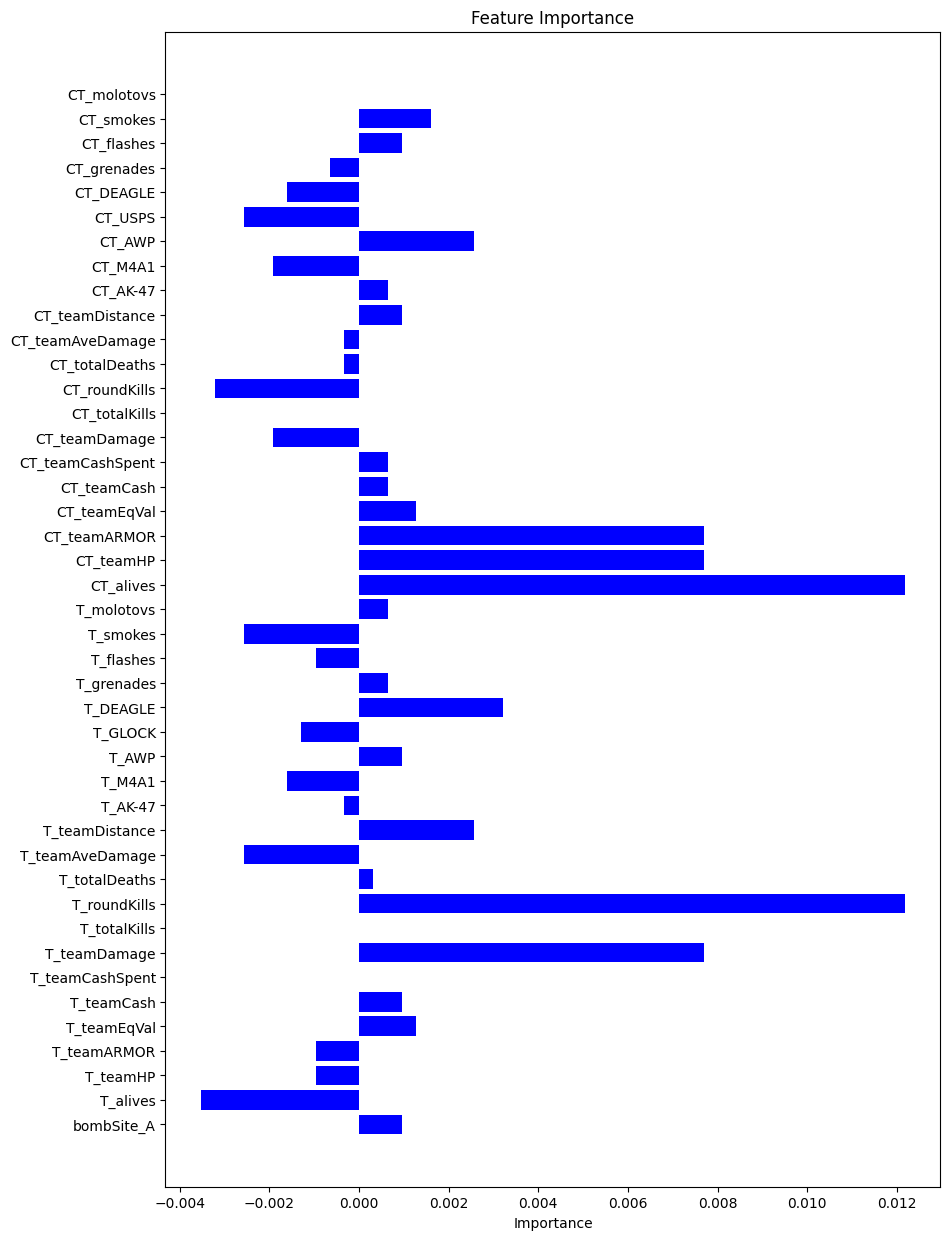

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
original_accuracy=accuracy_score(y_test, y_pred)
feature_importances = []

for i in range(X_train.shape[1]):
    # Create new training and testing sets without the current feature
    X_train_reduced = np.delete(X_train, i, axis=1)
    X_test_reduced = np.delete(X_test, i, axis=1)
    
    # Train a new classifier with the reduced dataset
    gnb_reduced = GaussianNB()
    gnb_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = gnb_reduced.predict(X_test_reduced)
    
    # Calculate the new accuracy
    reduced_accuracy = accuracy_score(y_test, y_pred_reduced)
    
    # Calculate the impact of removing the feature
    feature_importance = original_accuracy - reduced_accuracy
    feature_importances.append(feature_importance)
    print(f'Feature {df.columns[i]} importance: {feature_importance}')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 15))
plt.barh([df.columns[i] for i in range(len(feature_importances))], feature_importances, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.1)
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_labels))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-13 05:45:22.709345: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7990 - loss: 0.4101 - val_accuracy: 0.8446 - val_loss: 0.3278
Epoch 2/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8517 - loss: 0.3279 - val_accuracy: 0.8590 - val_loss: 0.3200
Epoch 3/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8657 - loss: 0.3010 - val_accuracy: 0.8582 - val_loss: 0.3164
Epoch 4/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8566 - loss: 0.3103 - val_accuracy: 0.8590 - val_loss: 0.3141
Epoch 5/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8587 - loss: 0.3082 - val_accuracy: 0.8502 - val_loss: 0.3152
Epoch 6/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8595 - loss: 0.3024 - val_accuracy: 0.8582 - val_loss: 0.3177
Epoch 7/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8602 - loss: 0.3047 - val_accuracy: 0.8566 - val_loss: 0.3195
Epoch 8/10
11223/11223 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Accuracy without feature 0: 0.8515073765234125


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
Accuracy without feature 1: 0.8428479794740218


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
Accuracy without feature 2: 0.8518280949326491


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 3: 0.8486209108402822


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 4: 0.8534316869788325


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 5: 0.8553559974342527


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 6: 0.8492623476587556


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
Accuracy without feature 7: 0.8518280949326491


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 8: 0.8508659397049391


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 9: 0.8479794740218088


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 10: 0.8492623476587556


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 11: 0.8479794740218088


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 12: 0.846696600384862


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
Accuracy without feature 13: 0.8524695317511225


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 14: 0.8428479794740218


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 15: 0.8476587556125722


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
Accuracy without feature 16: 0.8479794740218088


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 17: 0.844772289929442


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy without feature 18: 0.8483001924310456


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 19: 0.8524695317511225


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
Accuracy without feature 20: 0.8505452212957024


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
Accuracy without feature 21: 0.8463758819756254


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 22: 0.8534316869788325


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 23: 0.8483001924310456


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 24: 0.849903784477229


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 25: 0.8470173187940988


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 26: 0.8483001924310456


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
Accuracy without feature 27: 0.8489416292495189


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 28: 0.8473380372033354


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
Accuracy without feature 29: 0.8492623476587556


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy without feature 30: 0.845734445157152


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
Accuracy without feature 31: 0.8470173187940988


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
Accuracy without feature 32: 0.8441308531109686


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 33: 0.8518280949326491


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 34: 0.841565105837075


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 35: 0.8547145606157793


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
Accuracy without feature 36: 0.8508659397049391


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 37: 0.8486209108402822


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 38: 0.8473380372033354


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy without feature 39: 0.8483001924310456


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 40: 0.8505452212957024


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 41: 0.8515073765234125


/nas/home/andyxia/miniconda3/envs/csgo/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy without feature 42: 0.8454137267479154


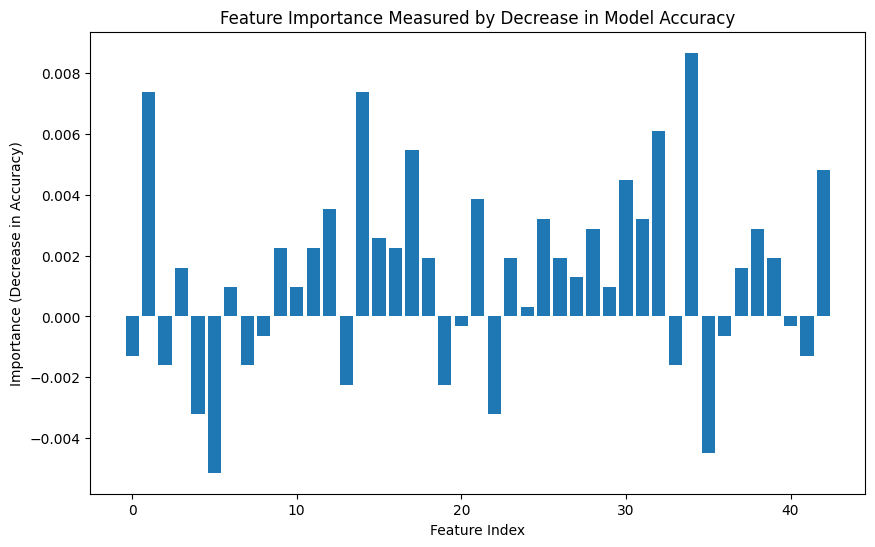

In [12]:
feature_importances = []
for i in range(X_train.shape[1]):
    # Remove the feature by setting it to zero (or you could remove the column entirely)
    X_train_reduced = np.copy(X_train)
    X_test_reduced = np.copy(X_test)
    X_train_reduced[:, i] = 0
    X_test_reduced[:, i] = 0

    # Create a new model (to avoid data leakage from previous training)
    model = Sequential([
        layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_reduced, y_train, epochs=10, batch_size=1, validation_split=0.1, verbose=0)

    # Predict and evaluate
    y_pred_reduced = model.predict(X_test_reduced)
    y_pred_labels_reduced = (y_pred_reduced > 0.5).astype(int)
    accuracy_reduced = accuracy_score(y_test, y_pred_labels_reduced)
    print(f'Accuracy without feature {i}: {accuracy_reduced}')
    
    # Record the impact of removing the feature
    feature_importances.append(accuracy - accuracy_reduced)

# Visualizing the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance (Decrease in Accuracy)')
plt.title('Feature Importance Measured by Decrease in Model Accuracy')
plt.show()

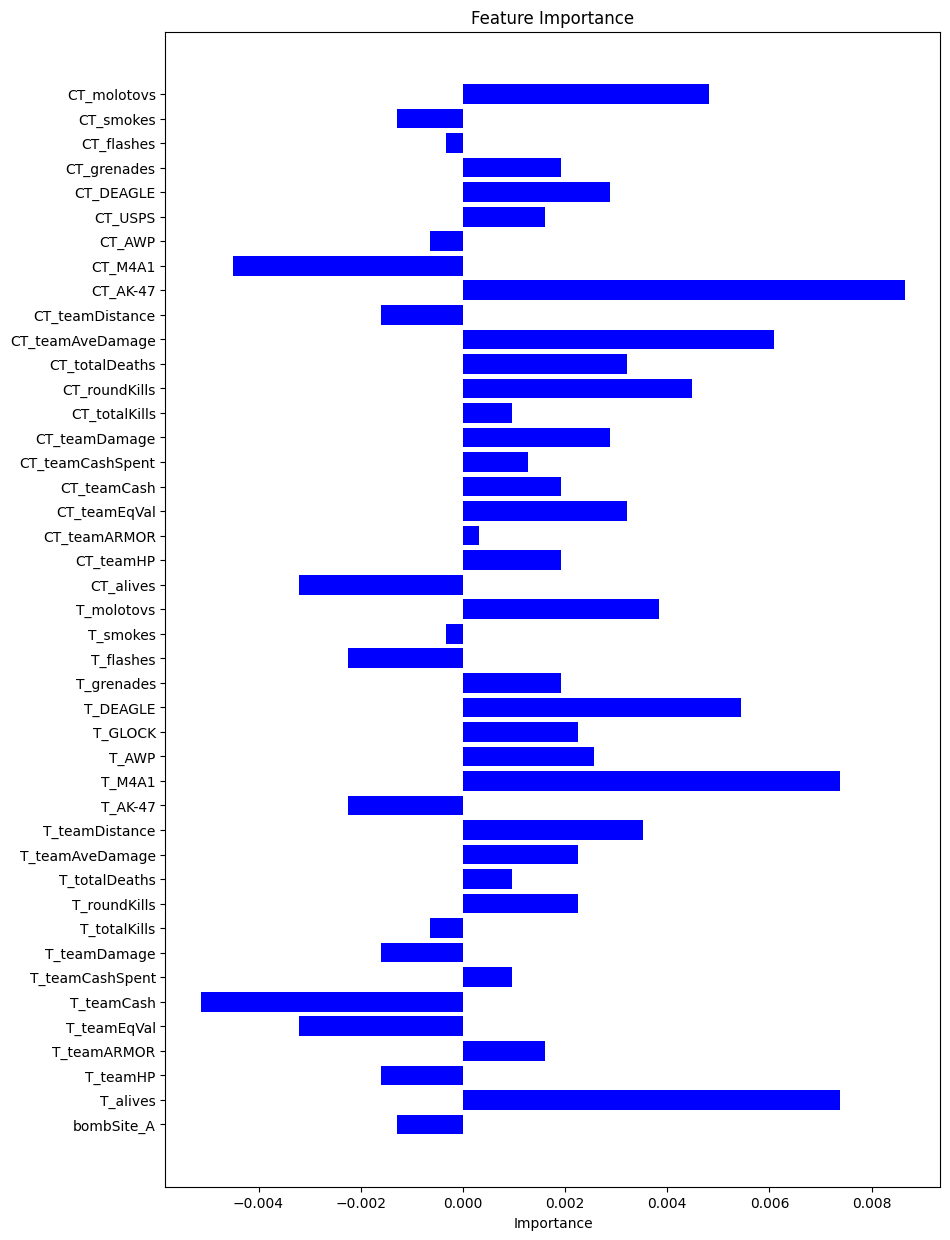

In [14]:
plt.figure(figsize=(10, 15))
plt.barh([df.columns[i] for i in range(len(feature_importances))], feature_importances, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Feature: bombSite_A, Score: 0.00384
Feature: T_alives, Score: 0.09462
Feature: T_teamHP, Score: 0.02915
Feature: T_teamARMOR, Score: 0.00000
Feature: T_teamEqVal, Score: 0.02459
Feature: T_teamCash, Score: 0.01091
Feature: T_teamCashSpent, Score: 0.01052
Feature: T_teamDamage, Score: 0.01352
Feature: T_totalKills, Score: 0.01167
Feature: T_roundKills, Score: 0.00531
Feature: T_totalDeaths, Score: 0.00799
Feature: T_teamAveDamage, Score: 0.01687
Feature: T_teamDistance, Score: 0.01088
Feature: T_AK-47, Score: 0.00382
Feature: T_M4A1, Score: 0.00053
Feature: T_AWP, Score: 0.00135
Feature: T_GLOCK, Score: 0.00340
Feature: T_DEAGLE, Score: 0.00103
Feature: T_grenades, Score: 0.00091
Feature: T_flashes, Score: 0.00363
Feature: T_smokes, Score: 0.00532
Feature: T_molotovs, Score: 0.00128
Feature: CT_alives, Score: 0.03568
Feature: CT_teamHP, Score: 0.04080
Feature: CT_teamARMOR, Score: 0.00000
Feature: CT_teamEqVal, Score: 0.01197
Feature: CT_teamCash, Score: 0.01053
Feature: CT_teamCashSpen

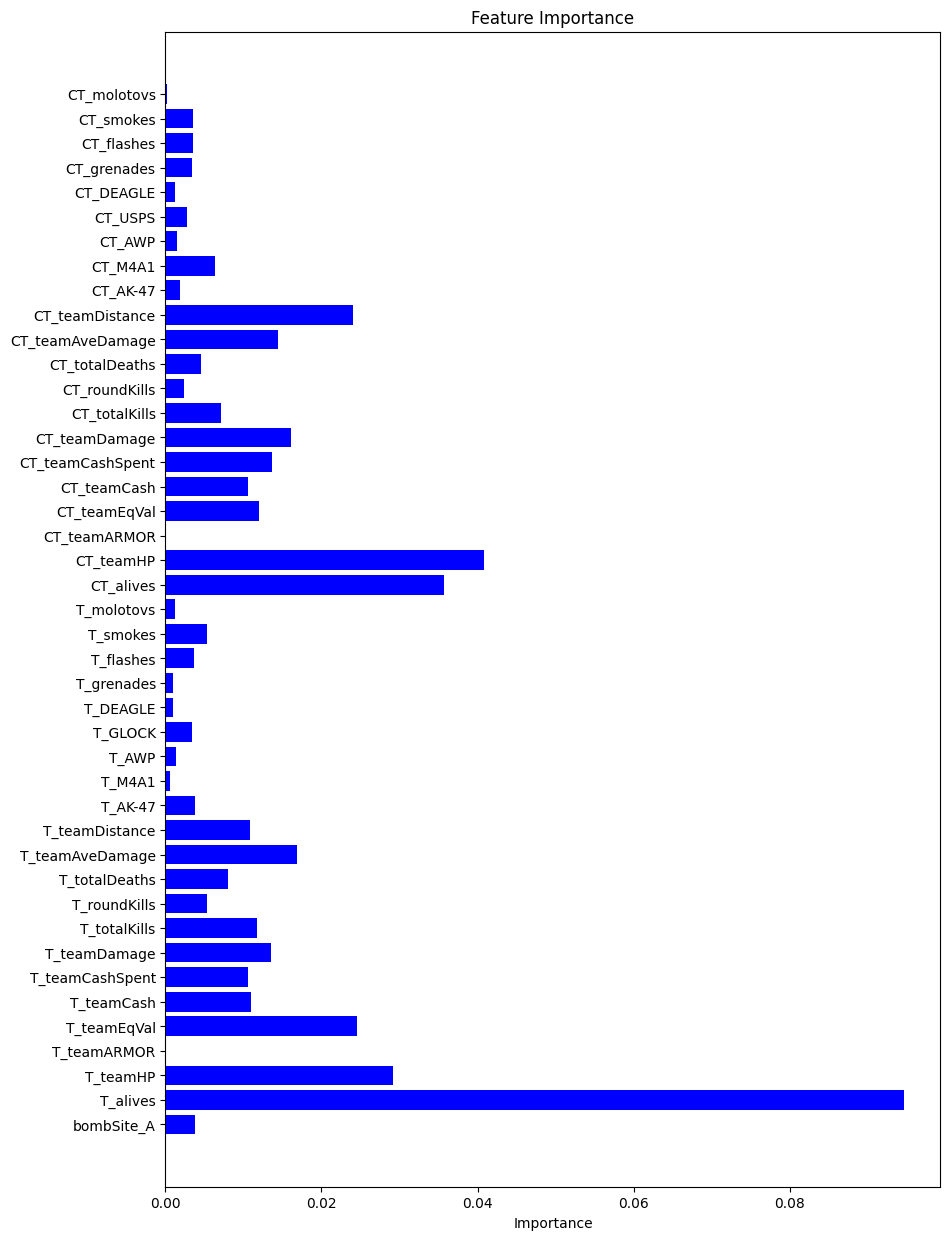

Accuracy: 0.8527902501603593
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       781
           1       0.89      0.92      0.90      2337

    accuracy                           0.85      3118
   macro avg       0.81      0.78      0.80      3118
weighted avg       0.85      0.85      0.85      3118



In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

importances = svm_model.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (df.columns[i],v))
plt.figure(figsize=(10, 15)) 
plt.barh([df.columns[i] for i in range(len(importance))], importance, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Feature: bombSite_A, Score: 0.00974
Feature: T_alives, Score: 0.24891
Feature: T_teamHP, Score: 0.01845
Feature: T_teamARMOR, Score: 0.00000
Feature: T_teamEqVal, Score: 0.01348
Feature: T_teamCash, Score: 0.00820
Feature: T_teamCashSpent, Score: 0.00862
Feature: T_teamDamage, Score: 0.01002
Feature: T_totalKills, Score: 0.00703
Feature: T_roundKills, Score: 0.10772
Feature: T_totalDeaths, Score: 0.01091
Feature: T_teamAveDamage, Score: 0.00828
Feature: T_teamDistance, Score: 0.00764
Feature: T_AK-47, Score: 0.01207
Feature: T_M4A1, Score: 0.00583
Feature: T_AWP, Score: 0.00732
Feature: T_GLOCK, Score: 0.00617
Feature: T_DEAGLE, Score: 0.00743
Feature: T_grenades, Score: 0.00880
Feature: T_flashes, Score: 0.00920
Feature: T_smokes, Score: 0.02123
Feature: T_molotovs, Score: 0.00635
Feature: CT_alives, Score: 0.16117
Feature: CT_teamHP, Score: 0.03677
Feature: CT_teamARMOR, Score: 0.00000
Feature: CT_teamEqVal, Score: 0.00986
Feature: CT_teamCash, Score: 0.00871
Feature: CT_teamCashSpen

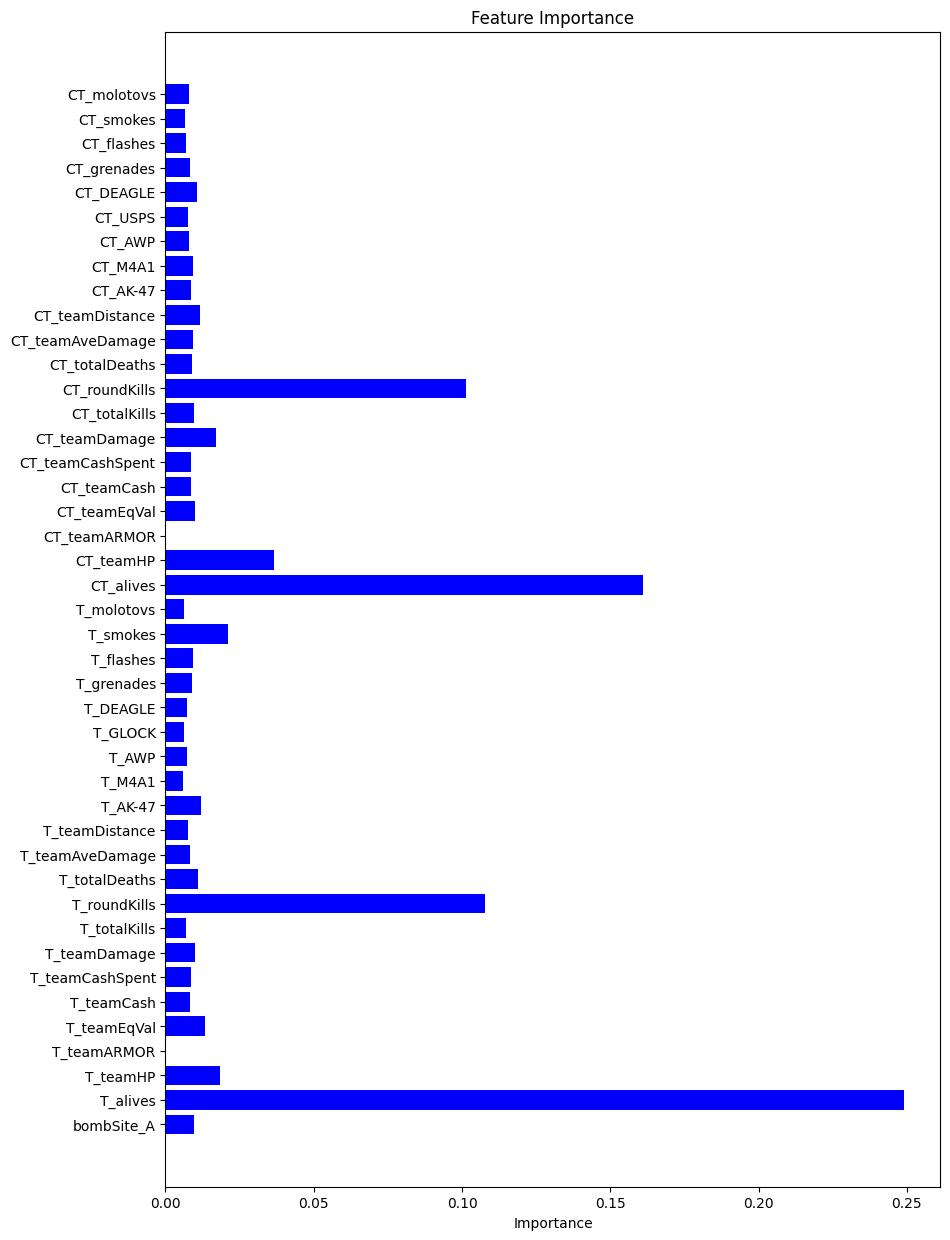

Accuracy: 0.841565105837075
Confusion Matrix:
 [[ 490  291]
 [ 203 2134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.66       781
           1       0.88      0.91      0.90      2337

    accuracy                           0.84      3118
   macro avg       0.79      0.77      0.78      3118
weighted avg       0.84      0.84      0.84      3118



In [32]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (df.columns[i],v))
plt.figure(figsize=(10, 15)) 
plt.barh([df.columns[i] for i in range(len(importance))], importance, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

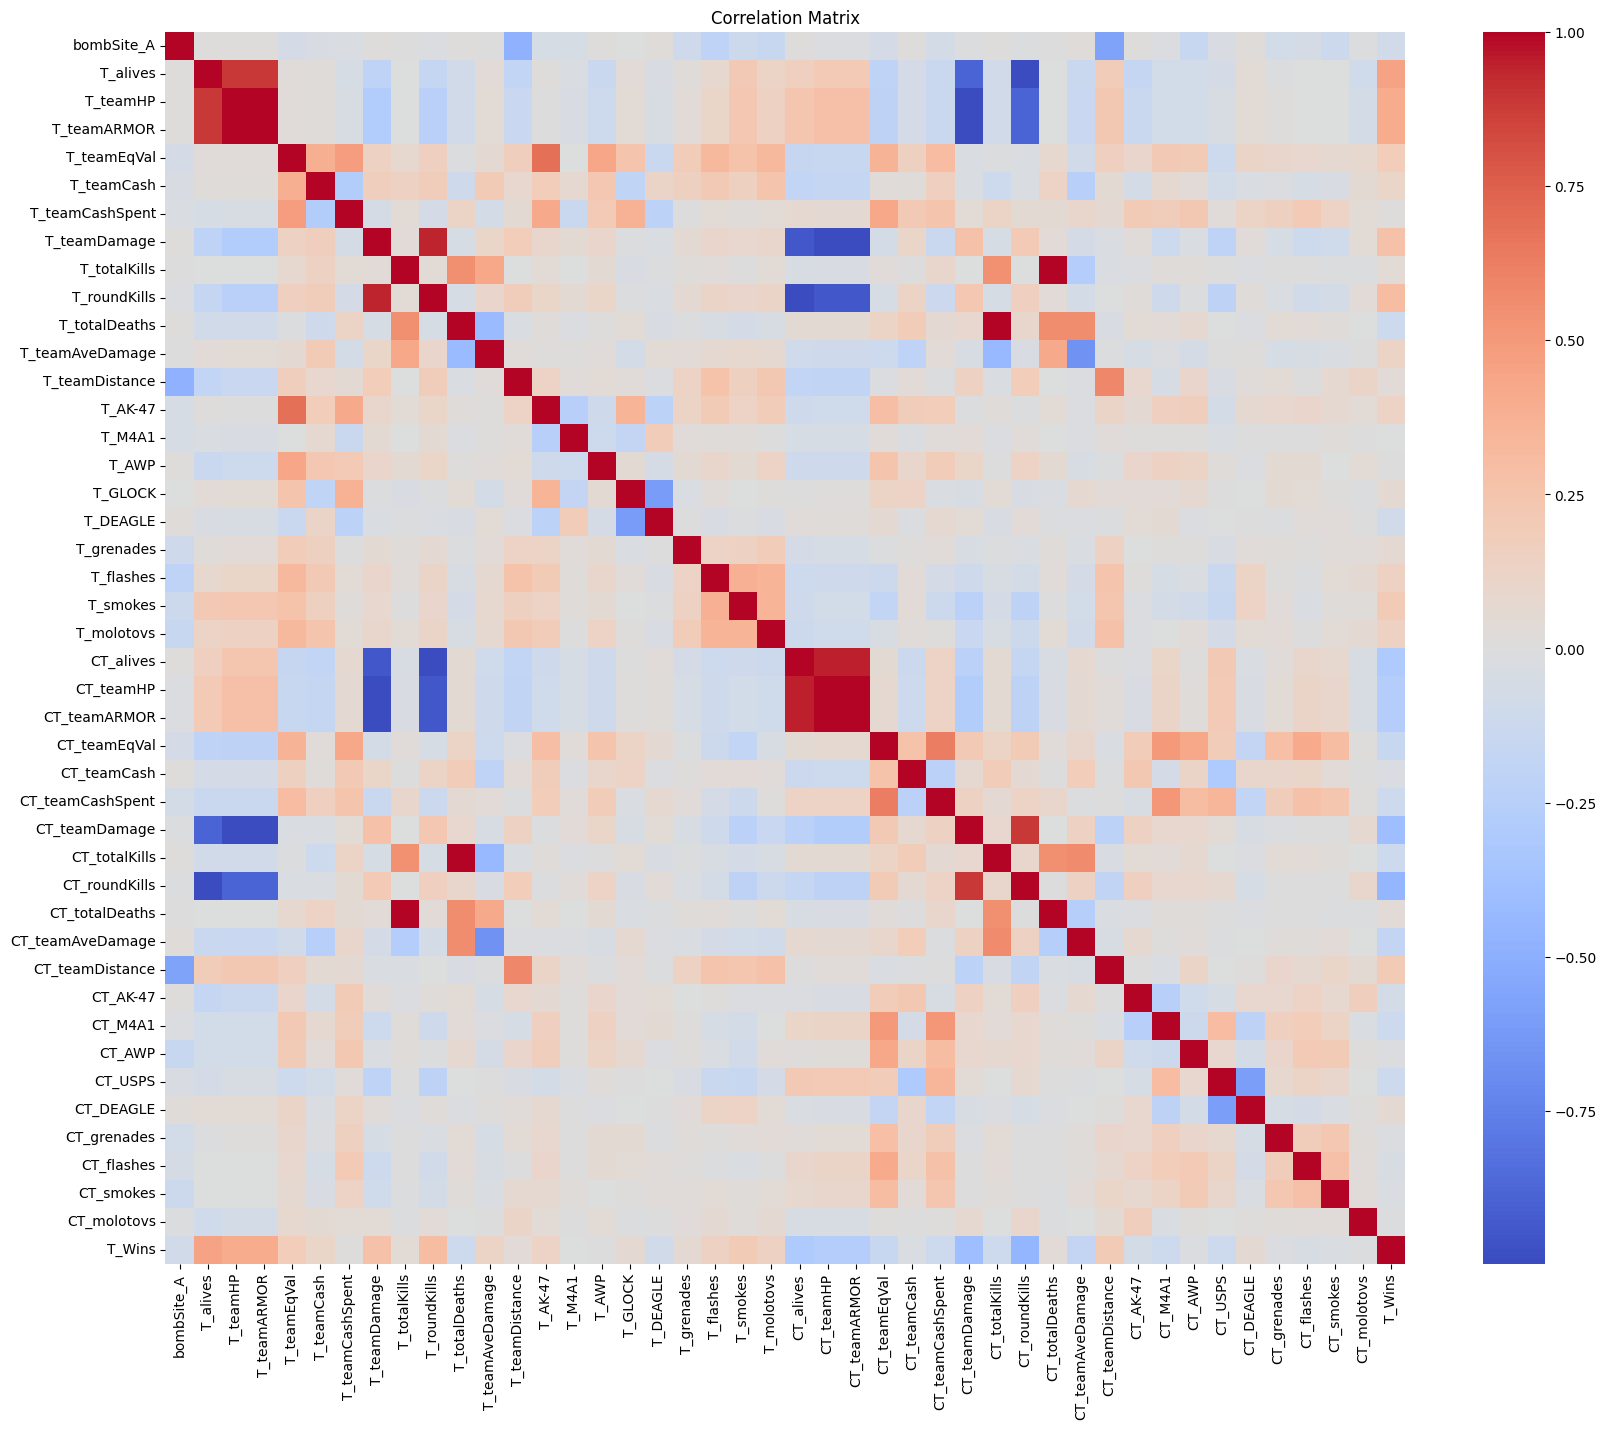

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()